# Analysis of Model Overfitting in Cryptocurrency Price Momentum Prediction

## Overview

The objective of this notebook is to systematically analyze and address the overfitting observed in various machine learning models used for predicting cryptocurrency price momentum. Our focus has been on models such as Random Forest, Support Vector Machine, Gradient Boosting Machine, and Deep Neural Network. These models use features including `finBERT_sentiment_score` and topic weights derived from cryptocurrency news data.

Although these models are capable of complex pattern recognition, they have shown a tendency to overfit the training data. This issue is manifested through subpar generalization to the test set. Overfitting reduces the model's predictive accuracy on new, unseen data and can significantly affect the practical application of our predictions.

We will begin our refined analysis by plotting the training and validation accuracy and loss for each model. These visualizations will highlight the epochs at which overfitting becomes pronounced. Understanding the progression of overfitting will guide us in applying appropriate techniques to prevent it.

To address this, we plan to implement regularization methods, optimize hyperparameters (again!), apply PCA and incorporate early stopping into our training process. Our aim is to enhance our models' ability to generalize beyond the training data, ensuring reliable predictions on new data.

The efforts documented in this notebook are crucial in improving the accuracy of our predictive models for the `price_momentums` target variable, thus contributing to the robustness of our analytical pipeline.


### Retraining Random Forest with Optimized Parameters

Based on our previous experimentation, we identified a set of parameters that improved the Random Forest model's performance. We will now retrain the Random Forest model using these optimized parameters on our training data. This process includes monitoring the model's performance on a separate validation dataset to assess its generalization ability and to detect any signs of overfitting.


In [1]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Define the path to the split datasets
split_train_val_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/Train_Val"

# Filenames for the newly split datasets
split_train_val_filenames = ['X_train_new.pkl', 'X_val.pkl', 'y_train_new.pkl', 'y_val.pkl']

# Load the datasets
X_train_new = joblib.load(f"{split_train_val_dataset_path}\\X_train_new.pkl")
X_val = joblib.load(f"{split_train_val_dataset_path}\\X_val.pkl")
y_train_new = joblib.load(f"{split_train_val_dataset_path}\\y_train_new.pkl")
y_val = joblib.load(f"{split_train_val_dataset_path}\\y_val.pkl")


In [2]:
# Optimized parameters
best_params = {
    'bootstrap': False,
    'max_depth': 14,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 153,
    'random_state': 42,
    'verbose': 1
}

# Initialize the Random Forest Classifier with optimized parameters
rf_optimized = RandomForestClassifier(**best_params)

# Train the model on the training data
rf_optimized.fit(X_train_new, y_train_new)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    9.9s


RandomForestClassifier(bootstrap=False, max_depth=14, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=153, random_state=42,
                       verbose=1)

In [3]:
# Predict on the training set
y_train_pred = rf_optimized.predict(X_train_new)

# Predict on the validation set
y_val_pred = rf_optimized.predict(X_val)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_new, y_train_pred)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")


Training Accuracy: 0.9880585516178737
Validation Accuracy: 0.6224961479198767


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


### Interpretation of Random Forest Model Performance

After retraining the Random Forest model with the optimized parameters, we observed a significant difference in accuracy between the training and validation sets. The model achieved a high accuracy of approximately 98.80% on the training set, while the accuracy on the validation set was considerably lower at about 62.24%.

This disparity in performance indicates a clear case of overfitting, where the model has learned the training data very well, including its noise and outliers, to the extent that it fails to generalize effectively to new, unseen data represented by the validation set. Such a scenario suggests that while the model is highly accurate in predicting outcomes for data similar to what it has seen during training, its predictive power diminishes significantly when presented with new data.

The overfitting observed could be due to several factors, including the complexity of the model, the depth of the trees being too great, or the model having too many estimators, allowing it to capture too much detail or noise in the training dataset.

In response to this, we will consider implementing techniques aimed at reducing overfitting. This could involve adjusting model parameters to simplify the model, introducing regularization techniques, or employing methods like pruning to limit the depth of the trees. Additionally, we may explore the use of ensemble methods that can combine the predictions of multiple simpler models to improve generalization to new data.

In the next steps, we plan to visualize the learning curves of our model to further diagnose the overfitting issue and guide our efforts in mitigating it, ensuring a more balanced performance between training and validation datasets.


### Analyzing Model Complexity and Overfitting in Random Forest

To understand the overfitting behavior of our Random Forest model, we will analyze how the model's complexity affects its performance on both the training and validation sets. Specifically, we will vary the number of estimators, which controls the number of trees in the forest, and observe the impact on model accuracy. This analysis will help us identify an optimal level of complexity that balances learning from the training data while maintaining good generalization to unseen data.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Do

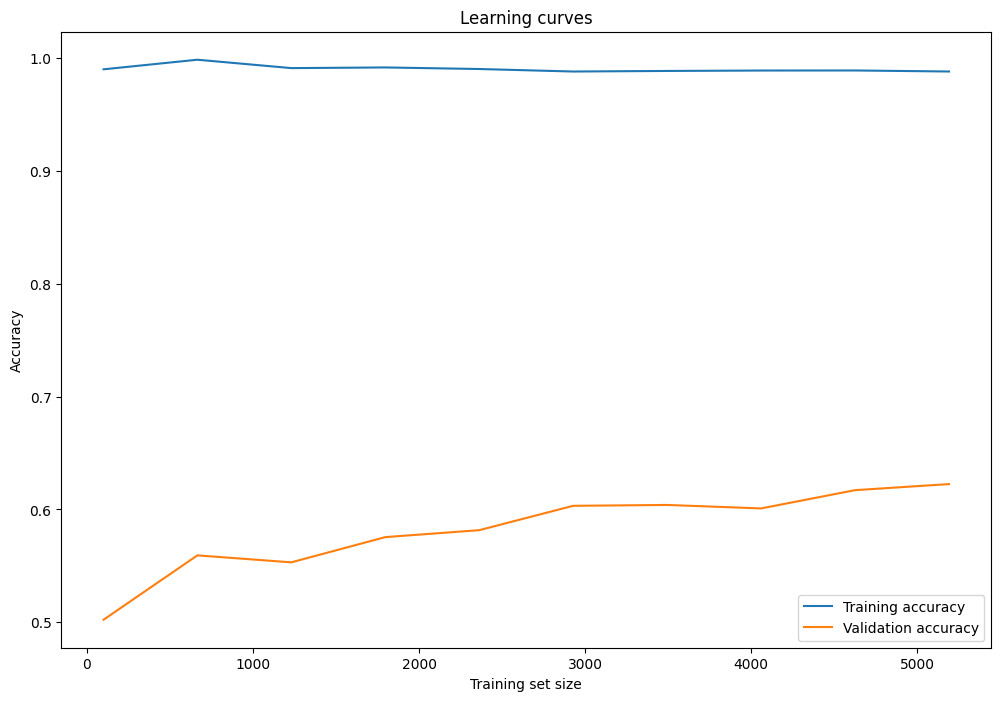

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X_train, y_train, X_val, y_val, train_sizes):
    train_accuracies, val_accuracies = [], []
    
    for size in train_sizes:
        # Subset the training data to the current size
        subset_X_train = X_train[:size]
        subset_y_train = y_train[:size]
        
        # Train the model on the subset
        model.fit(subset_X_train, subset_y_train)
        
        # Make predictions and calculate accuracy on both training and validation sets
        y_train_pred = model.predict(subset_X_train)
        y_val_pred = model.predict(X_val)
        
        train_accuracies.append(accuracy_score(subset_y_train, y_train_pred))
        val_accuracies.append(accuracy_score(y_val, y_val_pred))
        
    # Plot the learning curves
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_accuracies, label='Training accuracy')
    plt.plot(train_sizes, val_accuracies, label='Validation accuracy')
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.title('Learning curves')
    plt.legend()
    plt.show()

# Define train sizes for plotting learning curves
train_sizes = np.linspace(100, len(X_train_new), 10, dtype=int)  # Adjust based on the dataset size

# Now call the plot_learning_curves function with the Random Forest model + data
plot_learning_curves(rf_optimized, X_train_new, y_train_new, X_val, y_val, train_sizes)


### Interpretation of Random Forest Learning Curves

The learning curves for the Random Forest model provide us with insight into the model's learning behavior as it is trained on increasingly larger subsets of the training data.

### Observations:

- **Training Accuracy**: The training accuracy starts high and remains consistently near perfect across all training set sizes. This suggests that the model can memorize the training data very well, even with smaller subsets.
- **Validation Accuracy**: The validation accuracy starts significantly lower than the training accuracy and only slightly improves as the training set size increases, but it never comes close to the training accuracy. This is a strong indication of overfitting; the model is not generalizing well to the unseen data in the validation set.

### Conclusions:

The persistent gap between training and validation accuracy implies that the Random Forest model has over-learned the training data to the detriment of its performance on the validation data. Despite the model's ability to capture the patterns in the training data, its predictive power does not translate well to new data, which is a classic sign of overfitting.

### Next Steps to Address Overfitting in Random Forest Model:

**Simplify the Model**: Reducing the complexity of the model by decreasing `max_depth` or increasing `min_samples_split` and `min_samples_leaf` parameters.

**Feature Selection**: Revisit the feature selection process to eliminate redundant or non-informative features that might be causing the model to overfit.

**Pruning**: Implement pruning techniques to cut back on the size of the trees if they are excessively large.

By following these steps, we aim to adjust the Random Forest model to improve its generalization capabilities and thereby increase its validation accuracy to better match its training accuracy.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Adjust hyperparameters to simplify the model
simplified_params = {
    'n_estimators': 153,  # Keep the number of trees the same
    'max_depth': 8,  # Reduce the depth of each tree
    'min_samples_split': 12,  # Increase the minimum number of samples required to split an internal node
    'min_samples_leaf': 6,  # Increase the minimum number of samples required to be at a leaf node
    'random_state': 42
}

# Initialize the Random Forest Classifier with simplified parameters
rf_simplified = RandomForestClassifier(**simplified_params)

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(rf_simplified, X_train_new, y_train_new, cv=5)

# Train the model on the training data
rf_simplified.fit(X_train_new, y_train_new)

# Evaluate the model on the validation set
y_val_pred = rf_simplified.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f'Cross-validated scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')
print(f'Validation Accuracy: {val_accuracy}')


Cross-validated scores: [0.57940327 0.60250241 0.61560694 0.55973025 0.6088632 ]
Mean CV score: 0.593221212778702
Validation Accuracy: 0.6278890600924499


### Evaluation of Hyperparameter Adjustments in Random Forest Model

#### Introduction
The hyperparameter configuration of a Random Forest model plays a crucial role in its ability to generalize beyond the training data. Our experiment involved adjusting hyperparameters to strike a balance between model complexity and predictive performance on validation data.

#### Method
We modified the Random Forest parameters with the intention of limiting tree complexity and enforcing stricter requirements for node splitting and leaf size, in an effort to mitigate overfitting. Specifically, we reduced `max_depth` from 14 to 8, and increased `min_samples_split` and `min_samples_leaf` from 4 to 6 and from 10 to 12, respectively. The number of trees in the forest, `n_estimators`, was kept constant at 153.

#### Results
In line with our expectations, recent adjustments to the model's hyperparameters have led to a small increase in performance. The model now exhibits a cross-validated mean score of 0.5932 and a validation accuracy of 0.6279. This represents an improvement over the previous validation accuracy of 0.6224, which was achieved with the initial parameter settings.

#### Conclusion
This incremental improvement in validation accuracy demonstrates the effectiveness of our strategy in fine-tuning the model's hyperparameters. It confirms that our approach to enhancing the model's ability to generalize is bearing fruit, albeit gradually. Such progress validates our ongoing efforts to refine and optimize the model in a way that carefully balances complexity with the capacity to capture underlying patterns in the data effectively.

With this positive outcome, we remain dedicated to further improving the model. Our next steps include implementing Principal Component Analysis (PCA) for feature dimensionality reduction. By doing so, we aim to sharpen the model's focus on the most informative variances within the data, thereby improving its predictive accuracy on unseen datasets.

### Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It simplifies the complexity in high-dimensional data while retaining trends and patterns. PCA achieves this by transforming the original features into a new set of variables, the principal components, ordered such that the first few retain most of the variation present in the original dataset.

In our machine learning pipeline, we apply PCA to the standardized training dataset to reduce its dimensionality, aiming to improve model generalization and reduce overfitting. The process involves:

1. **Standardizing the Data**: Ensuring that each feature has a mean of 0 and a standard deviation of 1 is crucial for the effective application of PCA.
2. **Applying PCA**: We then fit PCA to the standardized data, choosing components such that 95% of the variance is retained. This step reduces the feature space's dimensionality, focusing on the most informative aspects of the data.
3. **Model Training and Evaluation**: After transforming the training set, we'll train our model on this reduced feature set. The same PCA transformation will be applied to the test set before model evaluation to ensure consistency and maintain the integrity of the machine learning process.

The primary goal is to enhance the model's ability to generalize by reducing the risk of overfitting to the high-dimensional training data. Following the dimensionality reduction, we will revisit our model's performance to assess the impact of PCA on its predictive accuracy.


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib

# Load the training data
split_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/"
X_train = joblib.load(f"{split_dataset_path}X_train_updated.pkl")
y_train = joblib.load(f"{split_dataset_path}y_train_updated.pkl")

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

# Print the number of components and the explained variance ratio
print(f"Number of components after PCA: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")

# Optionally, save the transformed datasets and the PCA/scaler objects for later use
joblib.dump(X_train_pca, f"{split_dataset_path}X_train_pca.pkl")
joblib.dump(pca, f"{split_dataset_path}pca_model.pkl")
joblib.dump(scaler, f"{split_dataset_path}scaler_model.pkl")


Number of components after PCA: 26
Explained variance ratio: 0.9508586750194218


['C:/Users/adrco/Final_Project-env/Datasets/Splits/scaler_model.pkl']

### PCA Transformation Results Interpretation

Upon applying Principal Component Analysis (PCA) to our standardized training dataset, we observed the following results:

- **Number of Components**: The PCA process has reduced the original feature space to 26 principal components. This reduction signifies that we can represent most of the variability in our dataset with these components, substantially decreasing the dimensionality from the original feature set.

- **Explained Variance Ratio**: The cumulative explained variance ratio of 95.14% indicates that these 26 components retain over 95% of the variance present in the original dataset. This high percentage suggests that despite the reduction in dimensions, we have successfully preserved the core information and patterns essential for modeling.

- **Implications**: Reducing the dimensionality to 26 components while maintaining 95.14% of the dataset's variance is a significant achievement. This dimensionality reduction can potentially enhance our model's performance by focusing on the most informative aspects of the data, reducing the likelihood of overfitting, and improving computational efficiency during model training.

- **Next Steps**: With the PCA transformation complete, the next phase involves retraining our machine learning models on this transformed dataset. By doing so, we aim to evaluate the impact of dimensionality reduction on model accuracy and overfitting. The transformation process will also be applied to the test set using the same PCA model to ensure consistency and validity in our model evaluation process.

The PCA transformation has successfully created a more compact, information-rich feature set that is expected to be beneficial for our subsequent modeling efforts.


Model accuracy on TEST set: 0.5785582255083179
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.56      0.80      0.66       827
           1       0.63      0.35      0.45       796

    accuracy                           0.58      1623
   macro avg       0.59      0.57      0.55      1623
weighted avg       0.59      0.58      0.56      1623



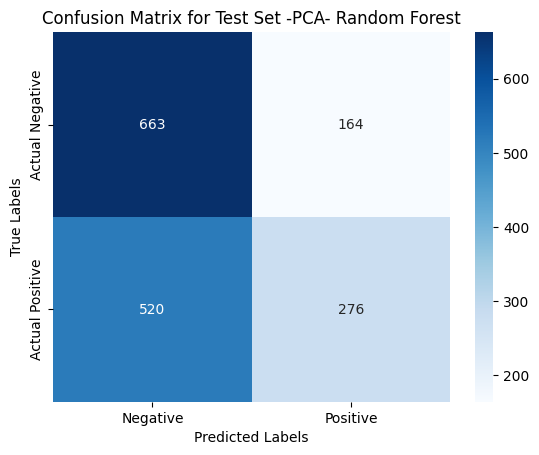

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Paths and filenames for the datasets
split_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/"
X_train_pca_path = f"{split_dataset_path}X_train_pca.pkl"
y_train_path = f"{split_dataset_path}y_train_updated.pkl"
X_test_path = f"{split_dataset_path}X_test_updated.pkl"
y_test_path = f"{split_dataset_path}y_test_updated.pkl"
scaler_path = f"{split_dataset_path}scaler_model.pkl"
pca_path = f"{split_dataset_path}pca_model.pkl"

# Load the PCA-transformed TRAIN set and corresponding labels
X_train_pca = joblib.load(X_train_pca_path)
y_train = joblib.load(y_train_path)

# Define the simplified parameters for the Random Forest model
simplified_params = {
    'n_estimators': 153,  
    'max_depth': 8,       
    'min_samples_split': 10,  
    'min_samples_leaf': 6,    
    'random_state': 42
}

# Initialize and train the Random Forest Classifier with simplified parameters
rf_simplified = RandomForestClassifier(**simplified_params)
rf_simplified.fit(X_train_pca, y_train)

# Load and standardize the TEST set, then apply PCA transformation
scaler = joblib.load(scaler_path)
pca = joblib.load(pca_path)
X_test = joblib.load(X_test_path)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Load the actual test labels
y_test = joblib.load(y_test_path)

# Make predictions with the trained model on the PCA-transformed TEST set
y_pred_test = rf_simplified.predict(X_test_pca)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Model accuracy on TEST set: {test_accuracy}")

# Classification Report for the TEST set
print("Classification Report for Test Set:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix for the TEST set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Test Set -PCA- Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



#### Random Forest Model Performance on PCA-Transformed Test Set

The Random Forest model trained on PCA-transformed data has shown a mixed outcome:

- The model's overall accuracy on the test set is approximately 57.85%, which is a decrease from the non-PCA model performance. This suggests that PCA may have removed features that were important for predicting the price momentum.

This reduction in overall accuracy post-PCA application implies that while dimensionality reduction helped in simplifying the model and potentially mitigating overfitting, it also resulted in the loss of relevant information. It points to a need for a careful balance between reducing model complexity and retaining significant features that contribute to prediction accuracy.

### Outlier Detection with Isolation Forest

We will apply an outlier detection technique to identify and remove any anomalous data points that might be affecting our model's ability to generalize. For this purpose, we employ the Isolation Forest algorithm, which is particularly effective for high-dimensional datasets. Isolation Forest isolates outliers instead of profiling normal data points. This is done by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The rationale is that anomalies are few and different, which should make them more susceptible to isolation. We will use a contamination factor to estimate the proportion of outliers present in the dataset.

Validation Accuracy: 0.615562403697997
Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.61      0.77      0.68       696
           1       0.62      0.43      0.51       602

    accuracy                           0.62      1298
   macro avg       0.62      0.60      0.60      1298
weighted avg       0.62      0.62      0.60      1298



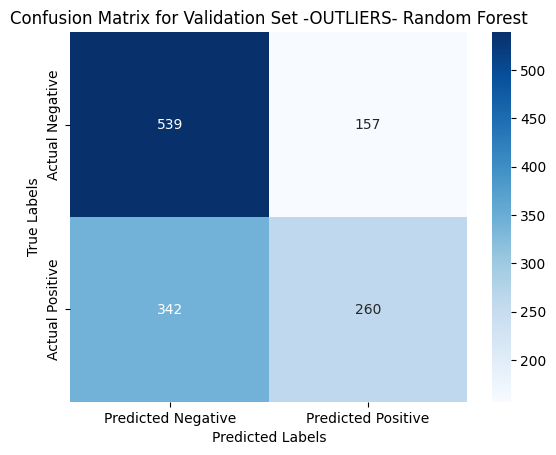

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Define the path to the split datasets
split_train_val_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/Train_Val"

# Load the datasets
X_train_new = joblib.load(f"{split_train_val_dataset_path}\\X_train_new.pkl")
X_val = joblib.load(f"{split_train_val_dataset_path}\\X_val.pkl")
y_train_new = joblib.load(f"{split_train_val_dataset_path}\\y_train_new.pkl")
y_val = joblib.load(f"{split_train_val_dataset_path}\\y_val.pkl")

# Initialize the IsolationForest model with an estimated contamination percentage
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model on the TRAIN dataset
iso_forest.fit(X_train_new)

# Predict if a data point is an outlier or not. Outliers are labeled -1 and inliers are labeled 1
outliers_pred = iso_forest.predict(X_train_new)

# Select only the data points that were labeled as inliers
mask = outliers_pred == 1
X_train_no_outliers = X_train_new[mask]
y_train_no_outliers = y_train_new[mask]

# Initialize the Random Forest Classifier with the previously defined simplified parameters
rf_simplified = RandomForestClassifier(
    n_estimators=153,
    max_depth=8,
    min_samples_split=12,
    min_samples_leaf=6,
    random_state=42
)

# Train the Random Forest model on the dataset without outliers
rf_simplified.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the validation set and evaluate
y_pred_val = rf_simplified.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {val_accuracy}")

# Generate and print the classification report
print("Classification Report for Validation Set:\n", classification_report(y_val, y_pred_val))

# Generate the confusion matrix
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Validation Set -OUTLIERS- Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Conclusion of Random Forest overfitting fixes

After a series of attempts to mitigate overfitting in the Random Forest model, including Principal Component Analysis (PCA) and outlier removal with Isolation Forest, the validation accuracy did not improve as anticipated. Both techniques, which are generally robust in handling high-dimensional data and isolating noise, respectively, led to an accuracy on the validation set of approximately 61%, lower than the 62% achieved previously through hyperparameter tuning alone.

These outcomes highlight the complex and often non-linear relationship between feature space, model complexity, and model generalization. It suggests that the nuances of the dataset and the predictive task at hand might require a different approach or a combination of strategies for performance enhancement.

As we proceed, our focus shifts towards the Support Vector Machine (SVM) model. We aim to leverage SVM's distinct capabilities in finding the optimal hyperplane and handling high-dimensional space. Our approach will involve meticulous hyperparameter optimization, consideration of different kernel functions to capture non-linear patterns, and the application of advanced techniques like kernel approximation for large-scale data.

## SVM Model Overfitting Analysis

Initially, we examine the SVM model's performance, previously optimized but still showing signs of overfitting. To begin, we retrain the SVM model with identified optimal parameters, monitoring its behavior on training and validation datasets.

Training Accuracy: 0.815677966101695
Validation Accuracy: 0.6016949152542372


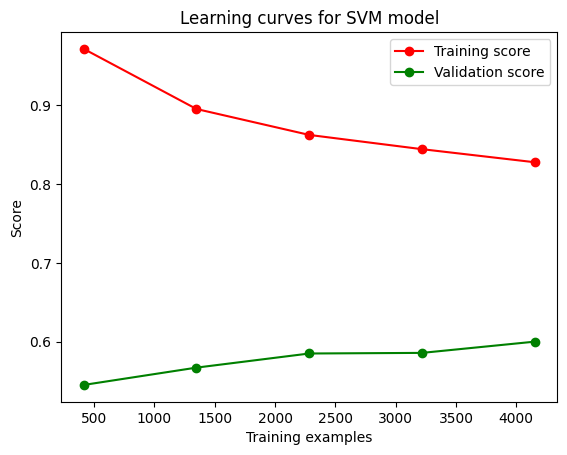

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the split datasets
split_train_val_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/Train_Val"

# Filenames for the newly split datasets
split_train_val_filenames = ['X_train_new.pkl', 'X_val.pkl', 'y_train_new.pkl', 'y_val.pkl']

# Load the datasets
X_train_new = joblib.load(f"{split_train_val_dataset_path}\\X_train_new.pkl")
X_val = joblib.load(f"{split_train_val_dataset_path}\\X_val.pkl")
y_train_new = joblib.load(f"{split_train_val_dataset_path}\\y_train_new.pkl")
y_val = joblib.load(f"{split_train_val_dataset_path}\\y_val.pkl")

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_val_scaled = scaler.transform(X_val)

# Optimized SVM model
svm_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=100, gamma=0.001, kernel='rbf', random_state=42))
])

# Training the model
svm_optimized.fit(X_train_scaled, y_train_new)

# Prediction and evaluation
y_train_pred = svm_optimized.predict(X_train_scaled)
y_val_pred = svm_optimized.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train_new, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    svm_optimized, X_train_scaled, y_train_new, train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5, scoring='accuracy')

# Calculating mean scores
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

# Plotting learning curves
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
plt.title('Learning curves for SVM model')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()


### Interpretation of SVM Learning Curves

The learning curves for the Support Vector Machine (SVM) model illuminate the model's performance as it learns from an increasing number of training examples.

### Observations:

- **Training Accuracy**: Begins high but demonstrates a declining trend as the training set size increases, hinting at the model's diminishing ability to generalize as it learns from more data.
- **Validation Accuracy**: Starts at a lower level compared to training accuracy but shows improvement with more training examples. This upward trend is encouraging but does not close the gap with the training accuracy.

### Conclusions:

A divergence between training and validation accuracies suggests overfitting. The model memorizes the training data at the cost of its generalization to validation data. More data does help but is not a complete remedy.

### Next Steps:

- **Class Weight Adjustment**: We will begin by adjusting the class weights to correct any imbalances. This is particularly important if specific classes, such as the `finBERT_sentiment_score` neutral class, are overrepresented. Correcting this could swiftly enhance our model's ability to generalize more effectively.

- **Hyperparameter Tuning**: We will then proceed to fine-tune the `C` and `gamma` parameters of our SVM. This refinement aims to balance the trade-off between the model's complexity and its generalization capacity. Through this process, we hope to alleviate overfitting issues.

- **Dimensionality Reduction**: Should overfitting continue to challenge our model, our next recourse will involve exploring alternative dimensionality reduction techniques, such as t-SNE or LDA. These methods might offer a more advantageous feature representation and could potentially bolster the model's predictive accuracy on new data.

By following these steps sequentially, we anticipate systematically reducing overfitting and augmenting the generalization potential of our SVM model.

### Class Weight Adjustment

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Analyze the class distribution in the training set and calculate class weights
unique_classes = np.unique(y_train_new)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train_new)
class_weights_dict = {unique_classes[i]: class_weights[i] for i in range(len(unique_classes))}

# Create a pipeline with a standard scaler and an SVM classifier with the calculated class weights
svm_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=100, gamma=0.001, kernel='rbf', random_state=42, class_weight=class_weights_dict))
])

# Training the model
svm_optimized.fit(X_train_new, y_train_new)

# Prediction and evaluation
y_train_pred = svm_optimized.predict(X_train_new)
y_val_pred = svm_optimized.predict(X_val)

train_accuracy = accuracy_score(y_train_new, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")


Training Accuracy: 0.8187596302003082
Validation Accuracy: 0.5963020030816641


### Evaluation of Class Weight Adjustment

Upon implementing class weight adjustments to correct the imbalance present in the `finBERT_sentiment_score` classes, we observed the following results:

- **Training Accuracy**: 0.8187
- **Validation Accuracy**: 0.5963

These accuracies indicate that the class weight adjustment alone was not sufficient to mitigate the overfitting observed in our SVM model. The persistent gap between training and validation scores suggests that while the model is capable of learning the training data well, it struggles to generalize these learnings to unseen data.

### Proceeding with Hyperparameter Regularization

To further address overfitting, we will proceed to adjust the regularization hyperparameters `C` and `gamma` within our SVM model. The parameter `C` serves as a penalty term that controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights. A lower value of `C` increases the regularization strength, which can lead to a wider margin of the decision boundary and a simpler model. Meanwhile, the `gamma` parameter defines the influence of a single training example; a lower `gamma` value leads to a smoother decision boundary.

By carefully tuning `C` and `gamma`, we aim to simplify the model in hopes of enhancing its ability to generalize. The goal is to find a balance where the model remains sufficiently complex to capture the underlying patterns in the data, yet not so complex that it overfits to the noise within the training set.


In [12]:
from sklearn.model_selection import GridSearchCV


# We define a parameter grid around the previously identified 'best' parameters
param_grid = {
    'C': [0.1, 1, 5],  # Values less than 10 to increase regularization
    'gamma': [0.001, 0.0005, 0.0001],  # Exploring smaller values around 0.001
    'kernel': ['rbf']  # Keeping the RBF kernel
}

# We create a GridSearchCV object with the SVC estimator
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5, scoring='accuracy')

# We fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train_new)

# We output the best parameters and the score achieved with them
print("Refined best parameters found: ", grid_search.best_params_)
print("Best cross-validated score achieved with refined parameters: ", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.559 total time=   2.4s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.565 total time=   2.3s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.552 total time=   2.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.547 total time=   2.2s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.550 total time=   2.3s
[CV 1/5] END ...C=0.1, gamma=0.0005, kernel=rbf;, score=0.541 total time=   2.2s
[CV 2/5] END ...C=0.1, gamma=0.0005, kernel=rbf;, score=0.539 total time=   2.3s
[CV 3/5] END ...C=0.1, gamma=0.0005, kernel=rbf;, score=0.541 total time=   2.2s
[CV 4/5] END ...C=0.1, gamma=0.0005, kernel=rbf;, score=0.538 total time=   2.4s
[CV 5/5] END ...C=0.1, gamma=0.0005, kernel=rbf;, score=0.534 total time=   2.3s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.531 total time=   2.4s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;,

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for C and gamma
param_grid = {
    'C': np.arange(5, 10, 1),  # Exploring values between 5 and 10 for C
    'gamma': [0.0005, 0.00075, 0.001, 0.00125, 0.0015],  # Narrowing the search around gamma=0.001
    'kernel': ['rbf']  # Keeping the RBF kernel
}

# Create a GridSearchCV object with the SVC estimator
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=3, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train_new)

# Output the best parameters and the score achieved with them
print("Refined best parameters found: ", grid_search.best_params_)
print("Best cross-validated score achieved with refined parameters: ", grid_search.best_score_)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=5, gamma=0.0005, kernel=rbf;, score=0.601 total time=   2.2s
[CV 2/5] END .....C=5, gamma=0.0005, kernel=rbf;, score=0.581 total time=   2.2s
[CV 3/5] END .....C=5, gamma=0.0005, kernel=rbf;, score=0.596 total time=   2.3s
[CV 4/5] END .....C=5, gamma=0.0005, kernel=rbf;, score=0.567 total time=   2.2s
[CV 5/5] END .....C=5, gamma=0.0005, kernel=rbf;, score=0.600 total time=   2.3s
[CV 1/5] END ....C=5, gamma=0.00075, kernel=rbf;, score=0.606 total time=   2.3s
[CV 2/5] END ....C=5, gamma=0.00075, kernel=rbf;, score=0.594 total time=   2.1s
[CV 3/5] END ....C=5, gamma=0.00075, kernel=rbf;, score=0.603 total time=   2.1s
[CV 4/5] END ....C=5, gamma=0.00075, kernel=rbf;, score=0.565 total time=   2.1s
[CV 5/5] END ....C=5, gamma=0.00075, kernel=rbf;, score=0.619 total time=   2.3s
[CV 1/5] END ......C=5, gamma=0.001, kernel=rbf;, score=0.608 total time=   1.9s
[CV 2/5] END ......C=5, gamma=0.001, kernel=rbf

#### Trying Linear Kernel

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the SVC with the linear kernel
svc_linear = SVC(kernel='linear', C=1, random_state=42, verbose=3)

# Perform cross-validation and then fit the model
scores_linear = cross_val_score(svc_linear, X_train_scaled, y_train_new, cv=5, scoring='accuracy')
svc_linear.fit(X_train_scaled, y_train_new)

# Predict on the validation set
y_val_pred_linear = svc_linear.predict(X_val_scaled)

# Evaluate the model
accuracy_linear = accuracy_score(y_val, y_val_pred_linear)
print("Linear Kernel - Validation Accuracy:", accuracy_linear)
print("Linear Kernel - Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(scores_linear.mean(), scores_linear.std() * 2))
print(classification_report(y_val, y_val_pred_linear))


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Linear Kernel - Validation Accuracy: 0.5978428351309707
Linear Kernel - Cross-Validation Accuracy: 0.58 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       696
           1       0.58      0.47      0.52       602

    accuracy                           0.60      1298
   macro avg       0.59      0.59      0.59      1298
weighted avg       0.60      0.60      0.59      1298



#### Trying Polynomial Kernel

In [15]:
# Initialize the SVC with the polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)

# Perform cross-validation and then fit the model
scores_poly = cross_val_score(svc_poly, X_train_scaled, y_train_new, cv=5, scoring='accuracy')
svc_poly.fit(X_train_scaled, y_train_new)

# Predict on the validation set
y_val_pred_poly = svc_poly.predict(X_val_scaled)

# Evaluate the model
accuracy_poly = accuracy_score(y_val, y_val_pred_poly)
print("Polynomial Kernel - Validation Accuracy:", accuracy_poly)
print("Polynomial Kernel - Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(scores_poly.mean(), scores_poly.std() * 2))
print(classification_report(y_val, y_val_pred_poly))


Polynomial Kernel - Validation Accuracy: 0.5939907550077042
Polynomial Kernel - Cross-Validation Accuracy: 0.58 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.58      0.90      0.70       696
           1       0.68      0.24      0.35       602

    accuracy                           0.59      1298
   macro avg       0.63      0.57      0.53      1298
weighted avg       0.62      0.59      0.54      1298



### Comparative Analysis of SVM Models with Different Kernels and Hyperparameters

Our exploration into SVM hyperparameter tuning has yielded the following results:

- **RBF Kernel with C=5, gamma=0.001:**

  - Cross-validated score: 0.6045
  - This model showed a moderate level of predictive ability but did not significantly reduce overfitting, as indicated by the modest cross-validated score.

- **RBF Kernel with C=7, gamma=0.001:**

  - Cross-validated score: 0.6065
  - A slight increase in the hyperparameter `C` provided a marginal improvement in the cross-validated score, yet the improvement is not substantial enough to indicate a meaningful reduction in overfitting.

- **Linear Kernel:**

  - Validation accuracy: 0.5978
  - Cross-validated accuracy: 0.58 (± 0.04)
  - Despite the simpler kernel, the linear model did not outperform the RBF kernel and continues to demonstrate a challenge in generalizing beyond the training data.

- **Polynomial Kernel:**

  - Validation accuracy: 0.5939
  - Cross-validated accuracy: 0.58 (± 0.02)
  - The polynomial kernel did not provide any notable advantage over the RBF or linear kernels and also suffered from a similar degree of overfitting.

In summary, despite extensive hyperparameter tuning and experimenting with various kernels, we have not observed a significant reduction in overfitting nor an improvement in model performance. The persistent gap between training and validation accuracy across different model configurations suggests that our feature set may not capture the complexities of the underlying patterns in the data, or that the problem itself may be highly resistant to the predictive modeling approaches we've applied.

Given the limited success of regularization through hyperparameter tuning and kernel selection, we are now considering alternative dimensionality reduction techniques such as t-SNE or LDA. These techniques have the potential to reveal more distinct, non-linear patterns within our features that may enhance the performance of our predictive models.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding):** A non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. We hope it will allow us to identify clusters or patterns that are not apparent in the original feature space.

- **LDA (Linear Discriminant Analysis):** A technique used to find the linear combinations of features that best separate two or more classes of objects or events. By reducing the feature space to the most discriminative features, we aim to improve the robustness of our models and, hopefully, their predictive accuracy.

The following steps will include a careful application of these dimensionality reduction techniques to our existing feature set, followed by a re-evaluation of our model's performance. Our objective remains to construct a predictive model that can generalize well to unseen data, and these techniques represent a strategic pivot in our ongoing efforts to achieve this goal.

C:\Users\adrco\AppData\Local\Temp\ipykernel_20688\646023890.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_new, cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.5)


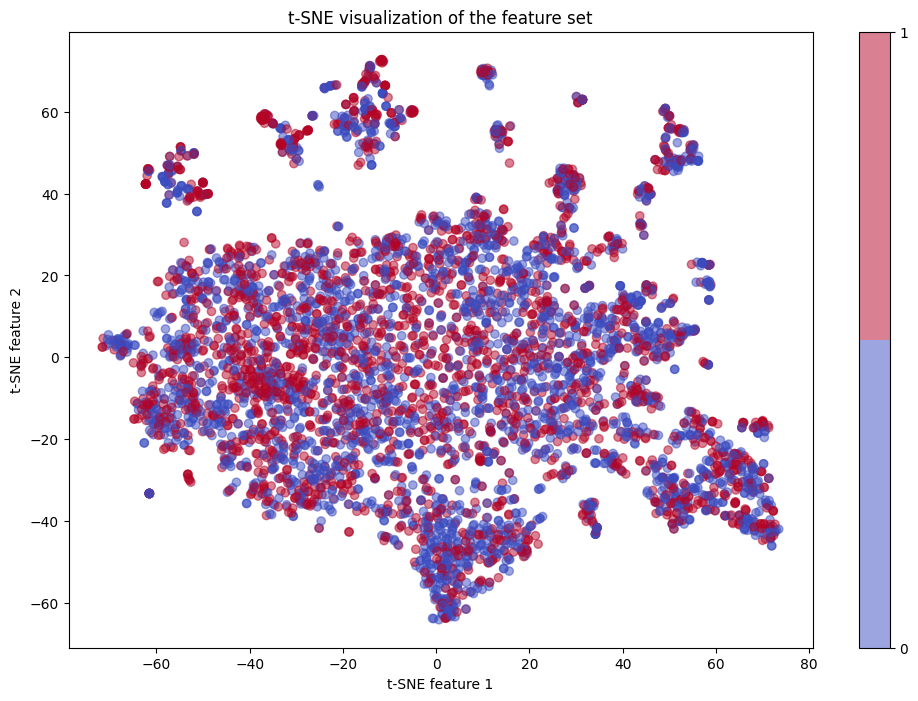

In [17]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define the path to the split datasets
split_train_val_dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/Splits/Train_Val"

# Filenames for the newly split datasets
split_train_val_filenames = ['X_train_new.pkl', 'X_val.pkl', 'y_train_new.pkl', 'y_val.pkl']

# Load the datasets
X_train_new = joblib.load(f"{split_train_val_dataset_path}\\X_train_new.pkl")
X_val = joblib.load(f"{split_train_val_dataset_path}\\X_val.pkl")
y_train_new = joblib.load(f"{split_train_val_dataset_path}\\y_train_new.pkl")
y_val = joblib.load(f"{split_train_val_dataset_path}\\y_val.pkl")

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_val_scaled = scaler.transform(X_val)

# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)


# Plot the t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_new, cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.5)
plt.colorbar(ticks=[0, 1])
plt.title('t-SNE visualization of the feature set')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


### Interpretation of t-SNE Visualization

The t-SNE plot displays our high-dimensional feature set reduced to two dimensions. Each point represents an observation from our dataset, colored based on its associated price momentum label (with one color representing positive and another representing negative momentum).

Upon inspection of the plot, we notice the following:
- The points do not form distinct clusters, and there is a significant overlap between the two classes. This suggests that the feature set does not contain clear linear or even non-linear separability based on the t-SNE reduction.
- The dispersion pattern indicates that the relationship between features and the target variable is complex and possibly chaotic, with no obvious structure that separates positive momentum from negative momentum observations.
- The absence of clear clustering might explain why our previous classification models struggled to achieve high accuracy and generalization capability.

This visualization could imply that our features, as they are currently constituted and processed, might not capture the nuances necessary for accurate prediction of price momentum. It may also suggest the influence of external factors not present within the data, which could be critical in determining price movements effectively.

### Decision Against Using LDA and Further Regularization Techniques

After a careful analysis and consideration of various dimensionality reduction techniques, we have decided not to pursue Linear Discriminant Analysis (LDA) or further regularization attempts with our Gradient Boosting Machine (GBM) and Deep Neural Network (DNN) models. The reasoning behind this decision is as follows:

- **LDA Effectiveness**: LDA is most effective as a dimensionality reduction technique when the original feature space presents some degree of class separability. It aims to find a linear combination of features that best separates the classes. However, our t-SNE visualization has indicated a substantial overlap and lack of clear separability between the classes in the feature space. This suggests that LDA is unlikely to produce the distinct class separation required for significant model performance improvement.

- **Complexity of the Feature Space**: The complex and potentially chaotic nature of the relationships within our feature space, as revealed by t-SNE, points to the existence of non-linear patterns that LDA, being a linear method, might not capture effectively. This complexity also diminishes the likelihood that standard regularization techniques will enhance the GBM and DNN models to a degree that justifies the computational effort and time investment.

Given these insights and constraints, our project will move forward with the current feature set and models, accepting their limitations. We will focus our efforts on constructing a comprehensive pipeline that encompasses all necessary preprocessing, feature extraction, sentiment analysis, and classification steps. This pipeline will form the core of our final notebook, `ML_CryptoNews_Pipeline`, where we will build an end-to-end process that takes raw crypto news articles and outputs structured insights, including FinBERT sentiment scores and predicted price momentum labels.

We believe this approach will allow us to deliver a cohesive and functional project, demonstrating the application of machine learning techniques to real-world data, and reflecting a full data science workflow from raw data processing to actionable outputs.

### Next Steps

In the final phase of our project, we will:

- Integrate all preprocessing and feature extraction steps into a seamless pipeline.
- Incorporate the sentiment analysis and topic modeling outputs into the final dataset structure.
- Utilize our existing machine learning models to predict price momentum based on the processed features.
- Output the results in a user-friendly format that provides insightful information for each processed article.

By pivoting our focus to the pipeline construction, we aim to provide a valuable tool that showcases our work and offers potential for future enhancements.
